## Predicting Heart Disease Diagnosis Using Classification 

**Group 002-17**
- Bryan Park
- Maysie Feng
- Alice Cao


## INTRODUCTION 

Coronary artery disease (CAD) is one of the most common types of heart diseases in the world. It is usually caused by plaques building up in the arteries wall and affecting regular heart functions (CDC 2021). The buildup of plaque can lead to atherosclerosis, which is the narrowing process of the artery walls (CDC 2021). 

The symptoms of CAD include chest pain, discomfort in the arms or shoulder, feeling sick to the stomach, or a cold sweat (CDC 2021). As time passes, CAD may lead to heart failure, resulting in a serious condition in which the heart cannot pump blood properly (CDC 2021). Many risk factors can increase the chance of developing CAD, including unhealthy eating, lack of physical activity, and smoking tobacco (CDC 2021). A family history of heart disease could also increase the risk of getting CAD (CDC 2021).

The question we will be addressing is **"How can different factors such as age, gender, resting blood pressure and maximum heart rate contribute in the process of diagnosing a patient of heart disease?"** 

The data set we are using is Cadiovascular_Disease_Dataset published on April 16, 2021 from Lincoln University College. The contributors are Bhanu Prakash Doppala and Debnath Bhattecharyya. The dataset was gathered from a multispecialty hospital in India and it contains 1000 subjects with 12 features. It has statsitics on a patients age, gender, cholesterol leveles, heart rate and their final test results. 




## PRELIMINARY EXPLORATORY DATA ANALYSIS

In [2]:
library(tidyverse)
library(tidymodels)
library(dplyr) 
set.seed(1)


Warning message:
“package ‘ggplot2’ was built under R version 4.3.2”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.5.0     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_co

In [3]:
#we will first read the data 
heart_disease <- read_csv("https://raw.githubusercontent.com/bmpark16/dsci100_project/main/Cardiovascular_Disease_Dataset.csv")

#this will show the first 6 rows of the raw data that we read in 
head(heart_disease)
print("Table 0.1 : table of the raw data that has been read straight from the web") 


Rows: 1000 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (14): patientid, age, gender, chestpain, restingBP, serumcholestrol, fas...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
103368,53,1,2,171,0,0,1,147,0,5.3,3,3,1
119250,40,1,0,94,229,0,1,115,0,3.7,1,1,0
119372,49,1,2,133,142,0,0,202,1,5.0,1,0,0
132514,43,1,0,138,295,1,1,153,0,3.2,2,2,1
146211,31,1,1,199,0,0,2,136,0,5.3,3,2,1
148462,24,1,1,173,0,0,0,161,0,4.7,3,2,1


[1] "Table 0.1 : table of the raw data that has been read straight from the web"


In [4]:
#we will turn the target column as a factor, and rename them as "Positive" and "Negative and store them on a separate column 
heart_disease <- heart_disease |> 
    mutate(test_result = as_factor(target)) |> 
    mutate(test_result = fct_recode(test_result, "Positive" = "1", "Negative" = "0"))

head(heart_disease) 
print("Table 0.2 : Data table with the test_result column refactored as Positive and Negative instead of 0 and 1") 

patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target,test_result
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
103368,53,1,2,171,0,0,1,147,0,5.3,3,3,1,Positive
119250,40,1,0,94,229,0,1,115,0,3.7,1,1,0,Negative
119372,49,1,2,133,142,0,0,202,1,5.0,1,0,0,Negative
132514,43,1,0,138,295,1,1,153,0,3.2,2,2,1,Positive
146211,31,1,1,199,0,0,2,136,0,5.3,3,2,1,Positive
148462,24,1,1,173,0,0,0,161,0,4.7,3,2,1,Positive


[1] "Table 0.2 : Data table with the test_result column refactored as Positive and Negative instead of 0 and 1"


**VARIABLES** 

To conduct our classification, we will be using 5 variables. 

- `age` : The age of the patients. 
- `serumcholesterol` (in mg/dl) : the amount of total cholesterol that is in the patient's blood. 
- `restingBP` (in mm HG) : the resting blood pressure of the patient. 
- `maxheartrate` (in bpm) : the maximum heart rate acheived by the patient. 
- `test_result` (Positive / Negative) : Wether or not the patient tested positive for heart disease.

The variables apart from `test_result` will be used as predictors. We have chosen these variables since patients with heart disease usually display a similar trend in these measures. For example, patients who have tested positive for heart disease are more likely to be older, having a higher resting blood pressure, higher cholesterol level and a higher heart rate. 

In [5]:
# we will only select the variables that we are going to be using as predictors. We will also filter the columns to make sure that we
# do not use columns that have "0" as the serum cholesterol value. 

heart_disease <- heart_disease |> 
    select(age,serumcholestrol,restingBP,maxheartrate, test_result) |> 
    filter(serumcholestrol != 0) 

head(heart_disease)
print("Table 0.3 : Data table only containing the variables that will be used during classification") 

age,serumcholestrol,restingBP,maxheartrate,test_result
<dbl>,<dbl>,<dbl>,<dbl>,<fct>
40,229,94,115,Negative
49,142,133,202,Negative
43,295,138,153,Positive
79,240,130,157,Positive
52,345,127,192,Negative
62,357,121,138,Negative


[1] "Table 0.3 : Data table only containing the variables that will be used during classification"


In order to yield a good classification, we must first train our model before implementing it on actual test data. To achieve this, we will be splitting our original data set so that we can train our model using 75% of our origianl data set. 

In [6]:
#we will split the data set so we can use 75% of the data to train, and the other 25% to actually test. 
heart_disease_split <- initial_split(heart_disease, prop = 0.75, strata = test_result)
heart_disease_train <- training(heart_disease_split)
heart_disease_test <- testing(heart_disease_split)

head(heart_disease_train)
print("Table 0.4: Sample of the training data set") 



age,serumcholestrol,restingBP,maxheartrate,test_result
<dbl>,<dbl>,<dbl>,<dbl>,<fct>
40,229,94,115,Negative
49,142,133,202,Negative
52,345,127,192,Negative
62,357,121,138,Negative
27,135,129,192,Negative
46,253,198,199,Negative


[1] "Table 0.4: Sample of the training data set"


[1] "figure 0.1 : Distribution of Age Amongst Heart Disease Patients"


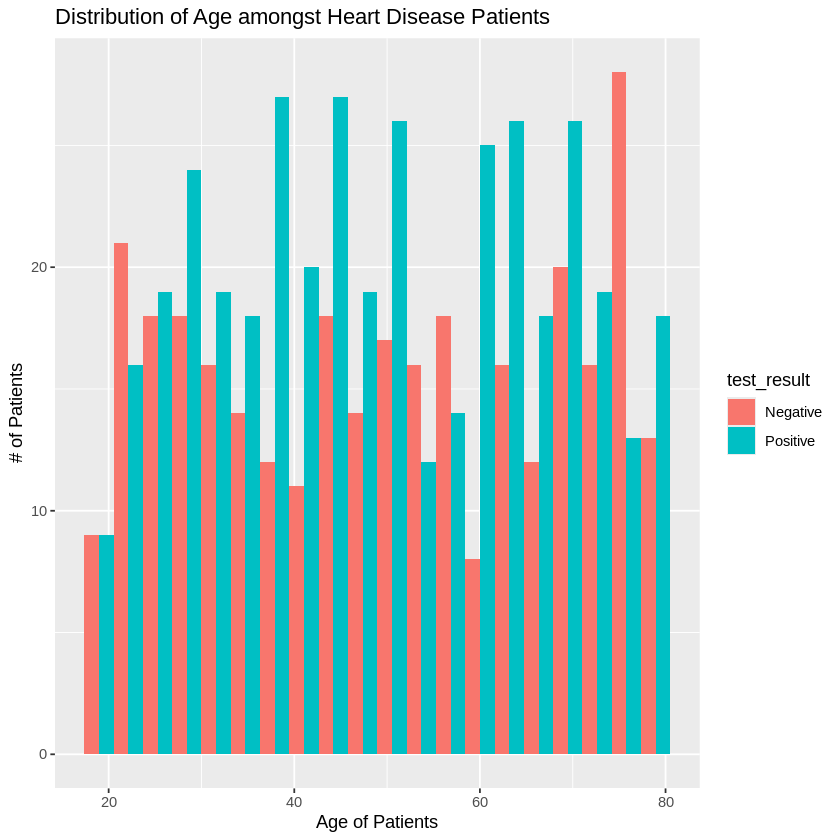

[1] "figure 0.2 : Distribution of Resting Blood Pressure Amongst Heart Disease Patients"


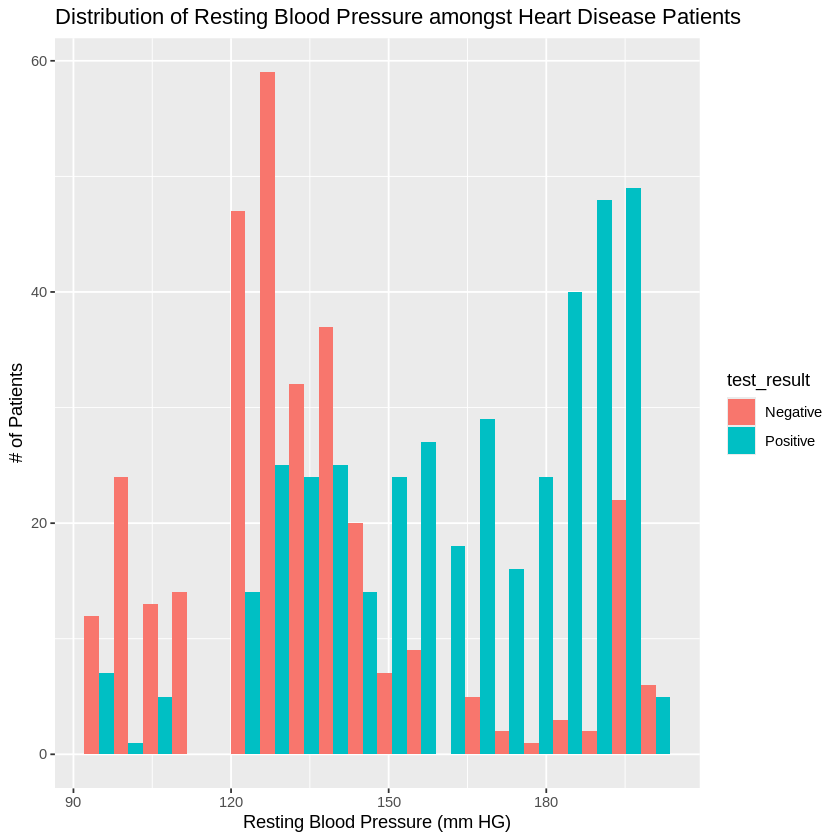

[1] "figure 0.3 : Distribution of Max Heart Rate Amongst Heart Disease Patients"


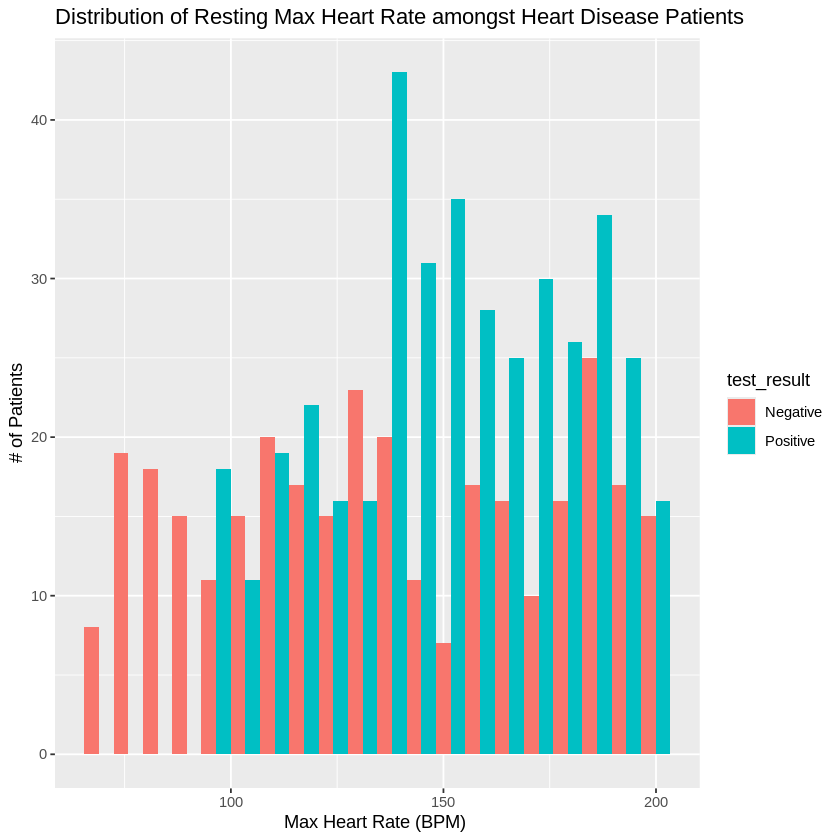

[1] "figure 0.4 : Distribution of Cholesterol Level Amongst Heart Disease Patients"


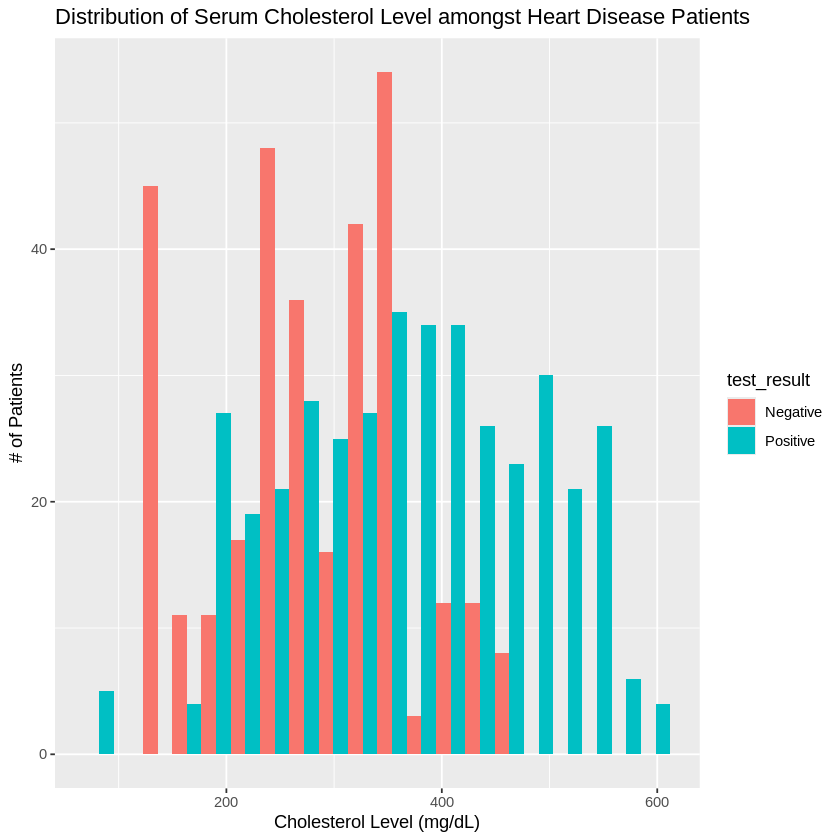

In [7]:
age_hist <- heart_disease_train |> 
    ggplot(aes(x = age, fill = test_result)) + 
    geom_histogram(position = "dodge", bins = 20) +
    labs(x = "Age of Patients", y = "# of Patients", color = "Test Result", title = "Distribution of Age amongst Heart Disease Patients")


bp_hist <- heart_disease_train |> 
    ggplot(aes(x = restingBP, fill = test_result))+ 
    geom_histogram(position = "dodge", bins = 20) +
    labs(x = "Resting Blood Pressure (mm HG)", y = "# of Patients", color = "Test Result", title = "Distribution of Resting Blood Pressure amongst Heart Disease Patients")


heartrate_hist <- heart_disease_train |> 
    ggplot(aes(x = maxheartrate, fill = test_result))+ 
    geom_histogram(position = "dodge", bins = 20) +
    labs(x = "Max Heart Rate (BPM) ", y = "# of Patients", color = "Test Result", title = "Distribution of Resting Max Heart Rate amongst Heart Disease Patients")

chol_hist <- heart_disease_train |> 
    ggplot(aes(x = serumcholestrol, fill = test_result))+ 
    geom_histogram(position = "dodge", bins = 20) +
    labs(x = "Cholesterol Level (mg/dL)", y = "# of Patients", color = "Test Result", title = "Distribution of Serum Cholesterol Level amongst Heart Disease Patients")


age_hist
print("figure 0.1 : Distribution of Age Amongst Heart Disease Patients") 
bp_hist
print("figure 0.2 : Distribution of Resting Blood Pressure Amongst Heart Disease Patients") 
heartrate_hist
print("figure 0.3 : Distribution of Max Heart Rate Amongst Heart Disease Patients") 
chol_hist
print("figure 0.4 : Distribution of Cholesterol Level Amongst Heart Disease Patients") 



In [8]:
summary_table <- heart_disease_train |> 
    group_by(test_result) |> 
    summarize(avg_age = mean(age, na.rm = TRUE), 
              avg_chol = mean(serumcholestrol, na.rm = TRUE),
              avg_bp = mean(restingBP, na.rm = TRUE), 
              avg_maxhr = mean(maxheartrate, na.rm = TRUE))

summary_table 
print("Table 0.5 : Summary Table") 

test_result,avg_age,avg_chol,avg_bp,avg_maxhr
<fct>,<dbl>,<dbl>,<dbl>,<dbl>
Negative,49.91111,278.9841,134.6095,135.7841
Positive,49.52911,370.0557,163.7570,152.3975


[1] "Table 0.5 : Summary Table"


Figure 0.5 provides the mean values of our predictors for the two groups of patients. It can be seen that the positive test result group reported a higher average cholestrol level, higher average resting blood pressure, and a higher average maximum heart rate. The average age between the two groups were about the same. 

## Methods 

To perform our research, we will be using the classification method learned in class. We will be using four different predictors (age, cholestrol level, resting blood pressure, and maximum heart rate) to predict a new patient's final test result. Before we do any classification procedures, we will scale all the predictors so that all of the factors have an "even say" during the classification process. Without this step, the age variable will get overshadowed by the other predictors due to its lower range of values. After the scaling procedure, we can then create scatter plots, comparing the different predictors on even footing, and coloring the scatter plots accordingly to the obesrvation's test result. A correct implementation of scaling and plotting will allow us to use the K-nearest neighbors classification algorithm to predict the test result of a new patient. 

## Expected outcomes and significance:


From our preliminary exploratory data analysis and also our pre-existing knowledge about heart disease, we expect patients that are older to have a higher chance of being diagnosed with heart disease. On top of that, our preliminary data analysis showed us that patients with a higher resting blood pressure (above 150 mmHG), higher maximum heart rate (above 150 bpm) and a higher chlesterol level (above 400 mg/dL) are more likely to be diagnosed with a positive heart disease check. 

If our expected outcome eventually meets with the statistical data, such findings will facilitate medical workers to better diagnose patients with heart diseases. They will be able to diagnose patients more accurately and efficiently based on the four different factors that we used.

The outcome of our research could pose further questions about habits that could lead to maintaining a healthy life style to prevent heart disease. Examples of such questions could be : 

- How does one maintain a lower maximum heart rate? Does nutrition play any part in this?
- What are some healthy habits that could lead to a lower choelstrol level.
- What actions/activities are recommended to older people in order to decrease the likelihood of having heart disease?

It could also raise a set of more scientific and medical questions, such as : 

- Which predictor has the strongest correlation between heart disease and itself?
- What other factors could increase the likelihood of heart disease?
- What is so different between younger and older people that increase the likelihood of heart disease? 


## PREPARING THE MODEL ## 

In order to conduct our data classification using the K-Nearest Neighbour algorithm, we must first create a recipe and a model. As we saw from figures 0.1, 0.2, 0.3 and 0.4, the variables have different range of values, with some variables having a much wider range compared to others. In the K-Nearest Neighbour algorithm, values with a wider range have a higher "voting power". Since we want to treat all the variables with equal importance, we must scale and center all of our predictors. 

As we do not yet know the best "k" value to use for our classification, we will set `neighbors` as `tune()` in our model. 

In [9]:
# Creating the engine 
knn_recipe <- recipe(test_result ~. , data = heart_disease_train) |> 
    step_scale(all_predictors()) |> 
    step_center(all_predictors()) 

# Creating the model 
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |> 
    set_engine("kknn") |> 
    set_mode("classification") 

knn_recipe 
knn_spec 



── Recipe ──────────────────────────────────────────────────────────────────────



── Inputs 

Number of variables by role

outcome:   1
predictor: 4



── Operations 

• Scaling for: all_predictors()

• Centering for: all_predictors()



K-Nearest Neighbor Model Specification (classification)

Main Arguments:
  neighbors = tune()
  weight_func = rectangular

Computational engine: kknn 


We will be conducting cross-validation using the `vfold_cv()` function and setting the `strata` as `test_result` and `v` as 5. Since we do not yet know the k-value that yields the best accuracy, we will create a tibble containing values from 1 to 50. By using this in during our `fitting` process, we can use the `collect_metrics()` function in order to get the accuracy of each k value from 1 to 50. 

In [11]:
k_vals <- tibble(neighbors = 1:50) 

training_vfold <- vfold_cv(heart_disease_train, v = 5, strata = test_result) 

knn_fit <- workflow() |> 
    add_recipe(knn_recipe) |> 
    add_model(knn_spec) |> 
    tune_grid(resamples = training_vfold, grid = k_vals) |> 
    collect_metrics() 

kvals_accuracy <- knn_fit |> 
    filter(.metric == "accuracy") 

head(kvals_accuracy)  
print("Table 1.0 : Table showing the accuracy values of the different K values from 1 to 50") 

neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.7366197,5,0.01660539,Preprocessor1_Model01
2,accuracy,binary,0.7366197,5,0.01660539,Preprocessor1_Model02
3,accuracy,binary,0.7619718,5,0.01642522,Preprocessor1_Model03
4,accuracy,binary,0.7619718,5,0.01642522,Preprocessor1_Model04
5,accuracy,binary,0.7732394,5,0.01397847,Preprocessor1_Model05
6,accuracy,binary,0.7732394,5,0.01397847,Preprocessor1_Model06


[1] "Table 1.0 : Table showing the accuracy values of the different K values from 1 to 50"


Using Table 1.0, we can plot the accuracy values in a scatter plot, which will visualize and allow us to determine which k-value to use. 

[1] 49

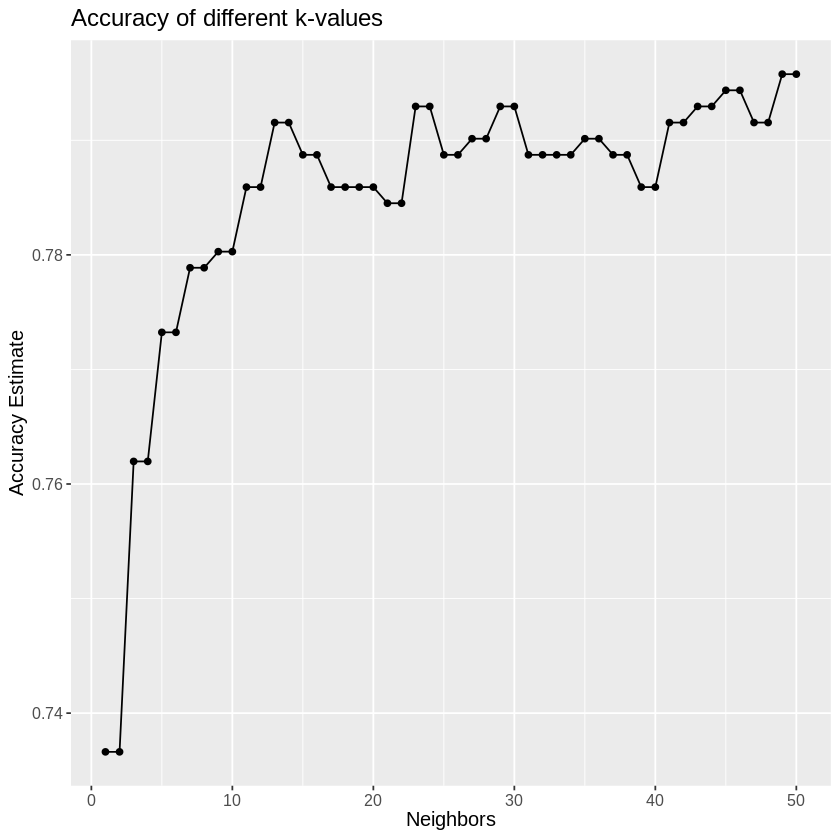

In [23]:
accuracy_plot <- ggplot(kvals_accuracy, aes(x = neighbors, y = mean)) +
  geom_point() +
  geom_line() +
  labs(x = "Neighbors", y = "Accuracy Estimate") +
  ggtitle("Accuracy of different k-values") + 
  theme(text = element_text(size = 12)) 

best_k <- kvals_accuracy |> 
    filter(mean == (max(mean))) |> 
    slice_min(neighbors) |> 
    pull(neighbors) 

accuracy_plot

We will be using the first k-value that yields the highest accuracy estimate, which in this case, turns out to be k = 49. 

Since we now have our best k-value, we can use this value when creating our model. 

In [33]:
knn_spec_best <- nearest_neighbor(weight_func = "rectangular", neighbors = best_k) |> 
    set_engine("kknn") |> 
    set_mode("classification") 

knn_best_fit <- workflow() |> 
    add_recipe(knn_recipe) |> 
    add_model(knn_spec_best) |> 
    fit(data = heart_disease_train)

knn_best_fit 

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(49L,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.2070423
Best kernel: rectangular
Best k: 49

Now that we have built our prediction model to use our best "k-value", we can now use it to form predictions on our testing data. 

## IMPLEMENTING THE MODEL TO TESTING DATA SET ## 

We will conduct our predictions using the `predict()` function and passing the `heart_disease_test` data set as its parameter alongside the model that we have built. We will then use `bind_cols()` to add the predictions into our testing data set. 

In [43]:
predictions <- predict(knn_best_fit, heart_disease_test) |> 
    bind_cols(heart_disease_test) 

head(predictions)  
print("Table 2.0 : First 6 rows of the data table including the predictions made by the model") 

.pred_class,age,serumcholestrol,restingBP,maxheartrate,test_result
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
Negative,59,209,98,117,Negative
Positive,58,354,170,170,Negative
Positive,65,247,200,194,Negative
Negative,35,269,127,87,Negative
Negative,24,164,136,91,Negative
Positive,59,223,156,184,Positive


[1] "Table 2.0 : First 6 rows of the data table including the predictions made by the model"


It seems that our model is making predictions. However, we are unable to determine the effectiveness and accuracy of our model by just looking at this table. To do this, we will use the `metrics()` function which returns our models accuracy metrices. Our `truth` value would be `test_result` and our `estimate` will be `.pred_class`. 

In [44]:
prediction_accuracy <- metrics(predictions, truth = test_result, estimate = .pred_class) 
prediction_accuracy 
print("Table 2.1 : Accuracy metrices of the prediction model") 

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.7805907
kap,binary,0.5536723


[1] "Table 2.1 : Accuracy metrices of the prediction model"


## Bibliography

CDC. “Coronary Artery Disease | Cdc.gov.” Centers for Disease Control and Prevention, 19 July 2021, www.cdc.gov/heartdisease/coronary_ad.htm#:~:text=Print-.

Doppala, Bhanu Prakash; Bhattacharyya, Debnath (2021), “Cardiovascular_Disease_Dataset”, Mendeley Data, V1, doi: 10.17632/dzz48mvjht.1